# Project :Diabetics Readmitted Classifactions Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Exploratory Data Analysis

- The EDA or Exploratory Data Analysis is the process of understanding data by exploring and analysis data with the help of the different types of visualization graphs.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [5]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The EDA part can be divided into two major pats
- 1) UniVariate Analysis

- 2) BiVariate Analysis

## UniVariate Analysis
The UniVarient Analysis is a simplest form of analyzing the data where we examine each and every individual varible and understand the data.
The UniVarient Analysis can be divided into two parts they are,
- 1. Numerical data
-- All the numerical features comes under this analysis
- 2. Categorical data
-- All the text data or object types comes under this analysis

## Numerical data

In [6]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 13
the numerical features: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [7]:
df[numerical_features].head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


Numerical variables are usually of 2 type
- 1. Continous variable and 
- 2. Discrete Variables

In [8]:
##Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<50]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


In [9]:
discrete_feature

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

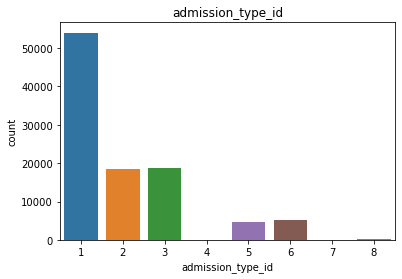

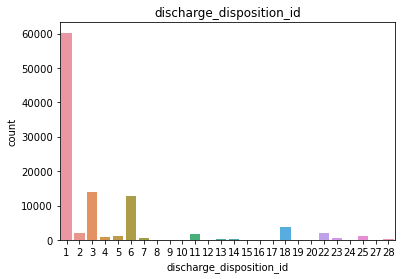

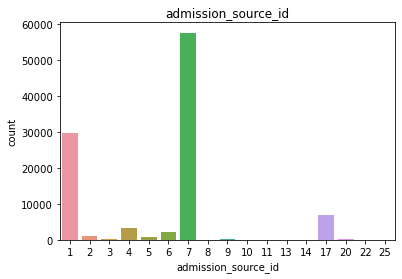

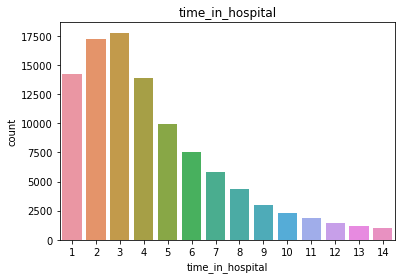

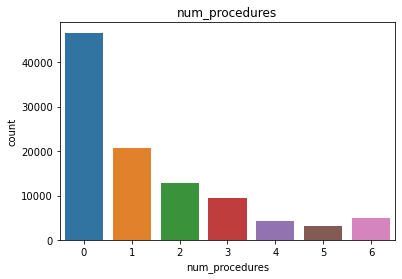

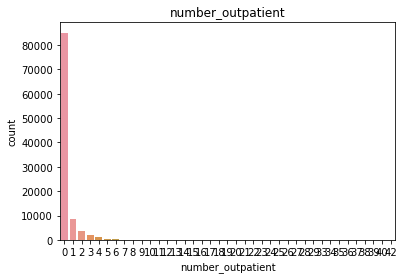

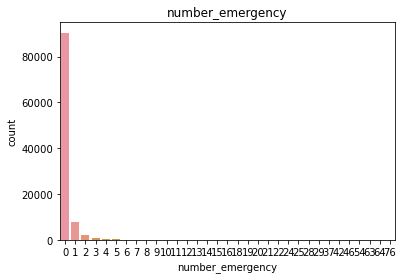

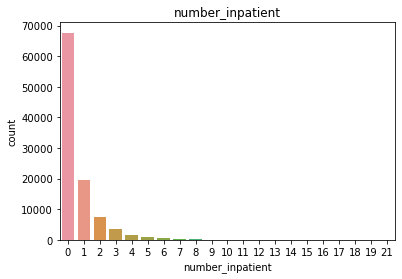

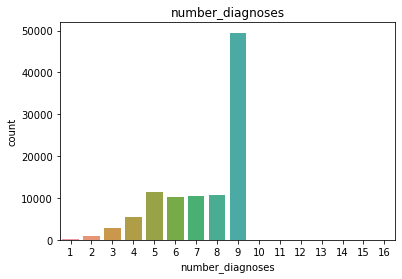

In [10]:
## Lets Find the discrete feature by visualizing data

for feature in discrete_feature:
    data=df.copy()
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [11]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [12]:
df[continuous_feature].head()

,encounter_id,patient_nbr,num_lab_procedures,num_medications
0,2278392,8222157,41,1
1,149190,55629189,59,18
2,64410,86047875,11,13
3,500364,82442376,44,16
4,16680,42519267,51,8


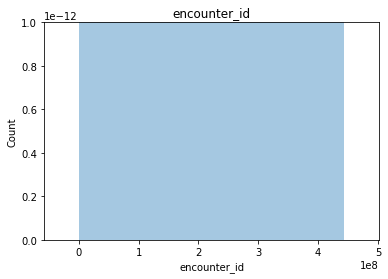

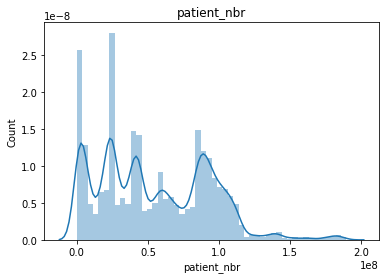

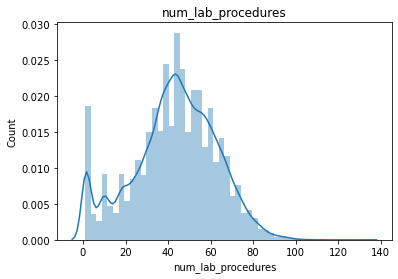

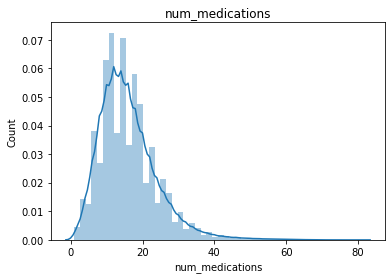

In [13]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    #data[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## categorical data

In [14]:
#list of categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [15]:
df[categorical_features].head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is race and number of categories are 6
The feature is gender and number of categories are 3
The feature is age and number of categories are 10
The feature is weight and number of categories are 10
The feature is payer_code and number of categories are 18
The feature is medical_specialty and number of categories are 73
The feature is diag_1 and number of categories are 717
The feature is diag_2 and number of categories are 749
The feature is diag_3 and number of categories are 790
The feature is max_glu_serum and number of categories are 4
The feature is A1Cresult and number of categories are 4
The feature is metformin and number of categories are 4
The feature is repaglinide and number of categories are 4
The feature is nateglinide and number of categories are 4
The feature is chlorpropamide and number of categories are 4
The feature is glimepiride and number of categories are 4
The feature is acetohexamide and number of categories are 2
The feature is glipizide and number 

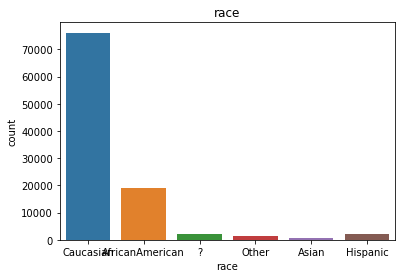

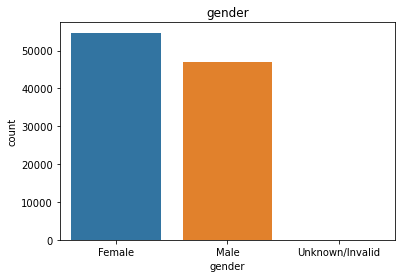

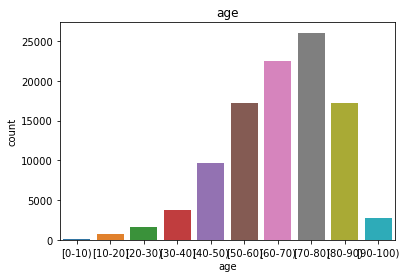

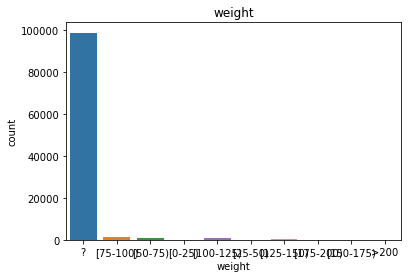

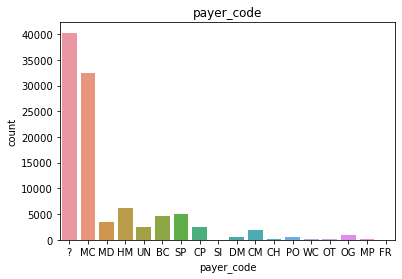

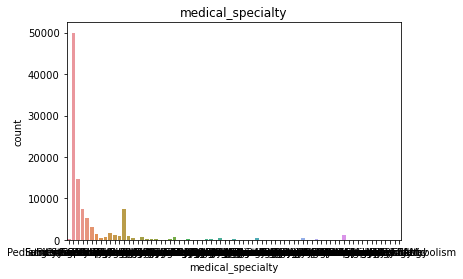

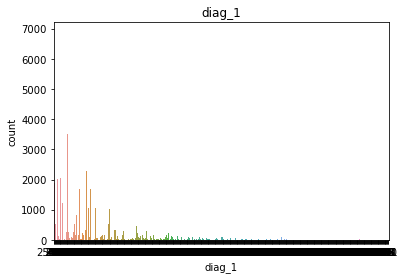

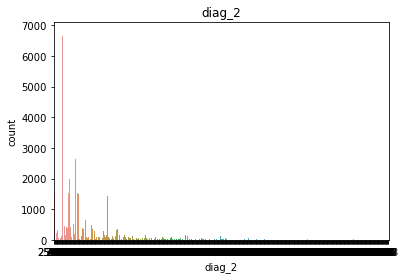

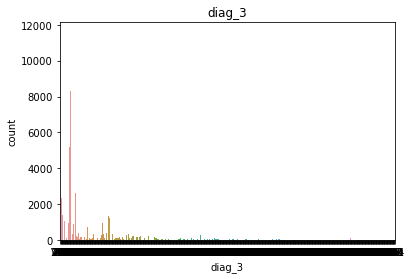

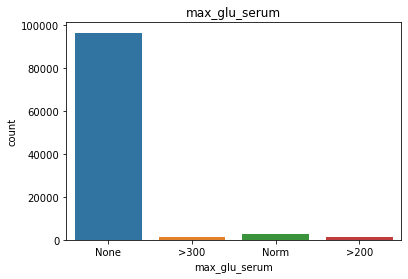

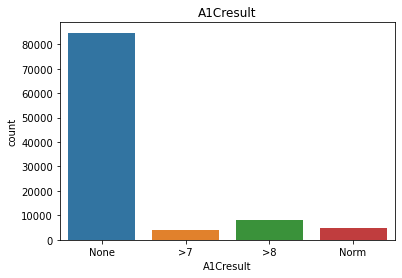

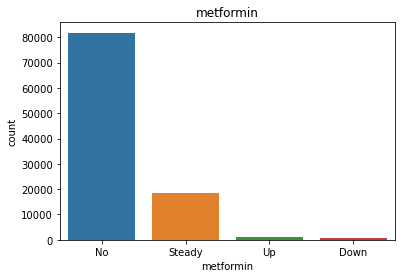

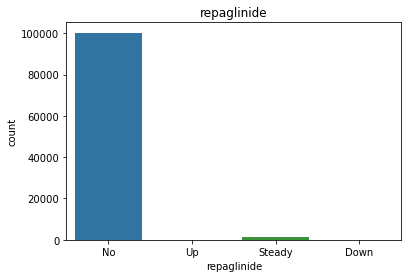

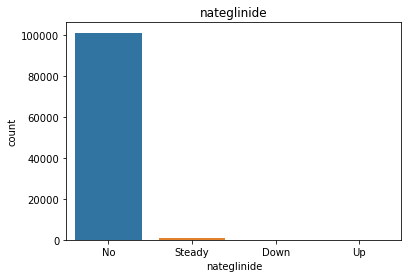

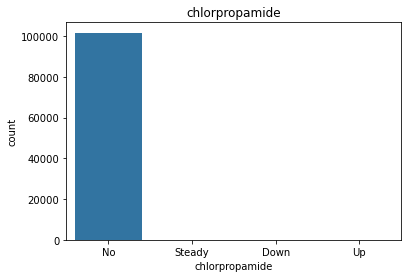

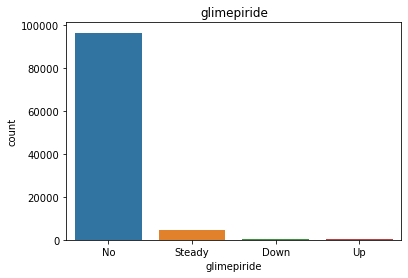

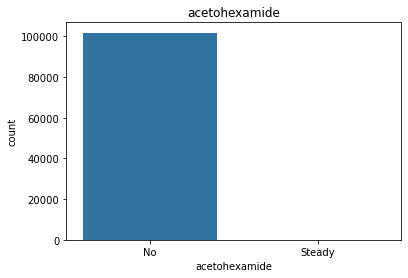

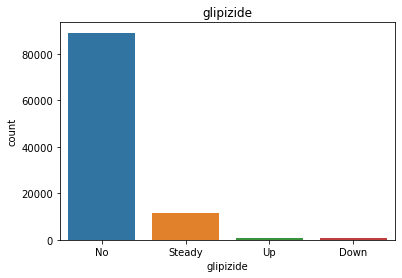

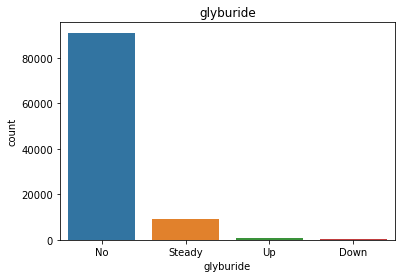

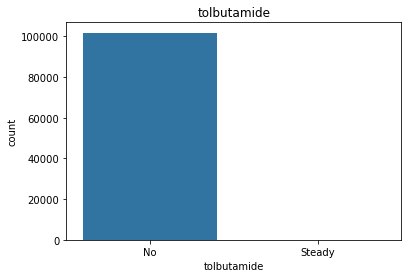

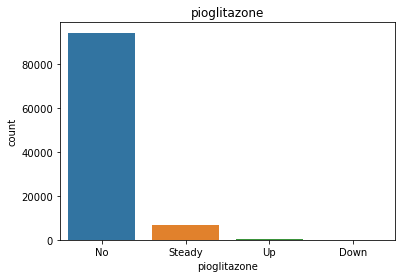

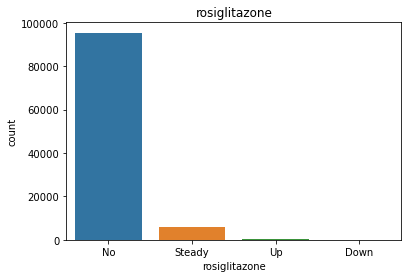

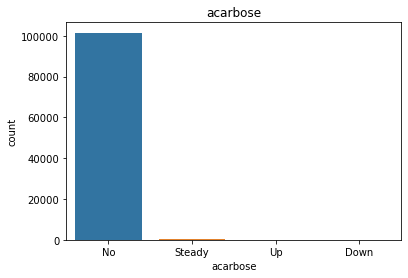

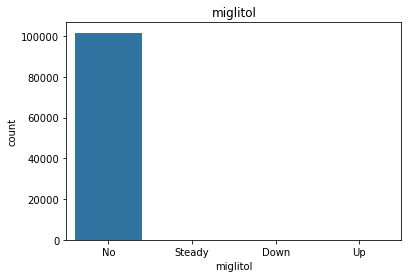

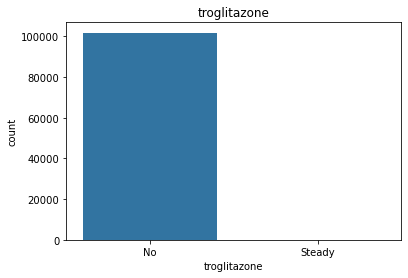

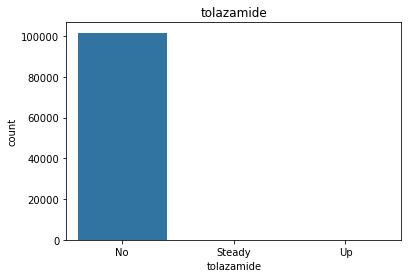

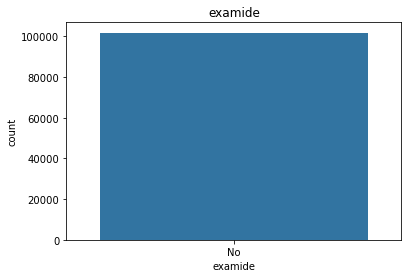

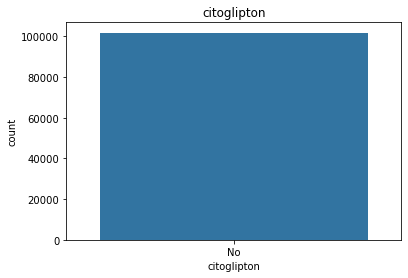

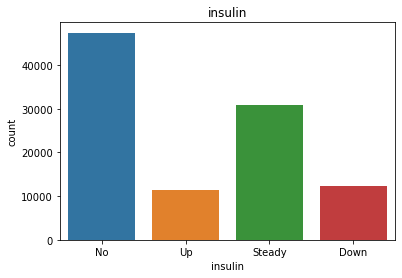

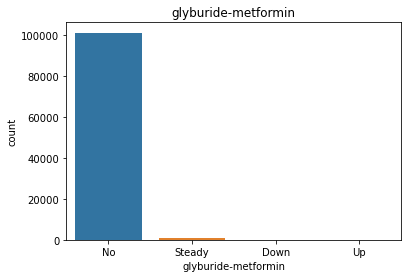

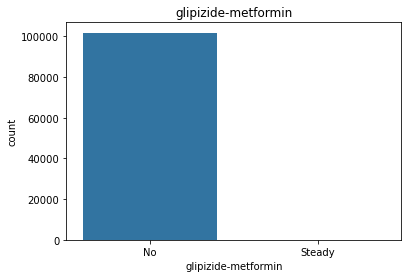

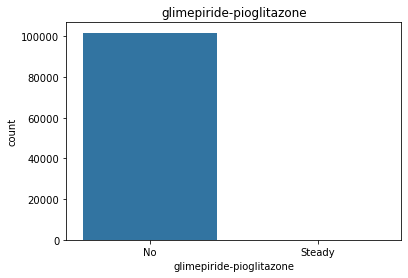

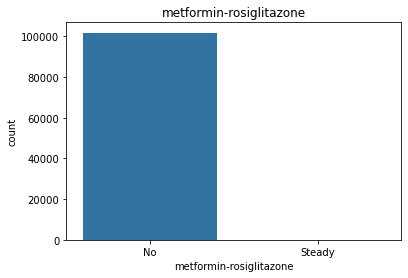

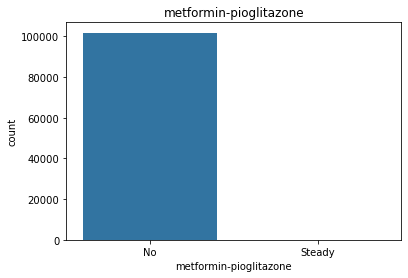

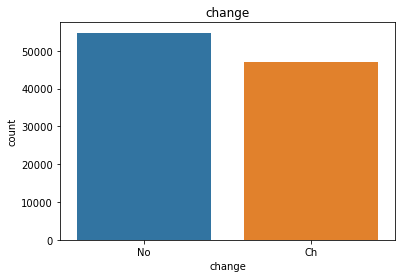

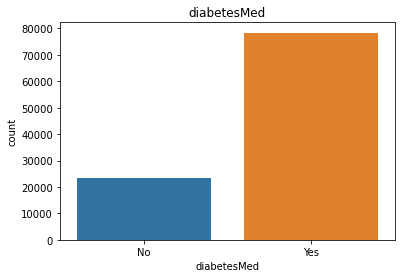

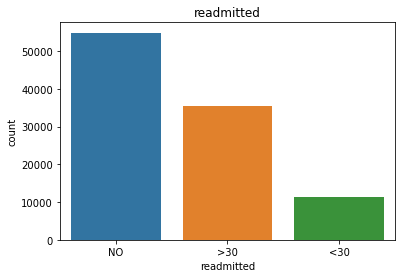

In [17]:
## Lets Find the categorical feature by visualizing data

for feature in categorical_features:
    data=df.copy()
    sns.countplot(data[feature])
    #data[feature].value_counts(normalize=True).plot.bar(title=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [18]:
#list of all unique values
clm=df.columns
for i in clm:
    print('unique value count of ',i,'\n',df[i].value_counts())

unique value count of  encounter_id 
 96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
unique value count of  patient_nbr 
 88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64
unique value count of  race 
 Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
unique value count of  gender 
 Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
unique value count of  age 
 [70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)    

unique value count of  insulin 
 No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64
unique value count of  glyburide-metformin 
 No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64
unique value count of  glipizide-metformin 
 No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
unique value count of  glimepiride-pioglitazone 
 No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
unique value count of  metformin-rosiglitazone 
 No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
unique value count of  metformin-pioglitazone 
 No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64
unique value count of  change 
 No    54755
Ch    47011
Name: change, dtype: int64
unique value count of  diabetesMed 
 Yes    78363
No     23403
Name: diabetesMed, dtype: int64
unique value count of  readmitted 
 NO     5

## BiVariate analysis

In Bivariate Analysis we compare the target column with all the other columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

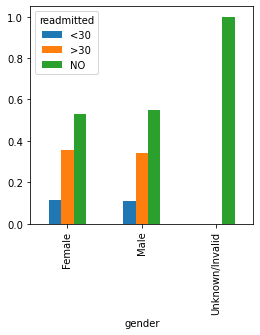

In [20]:
#lets see gender vs readmitted
gender=pd.crosstab(df['gender'],df['readmitted'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

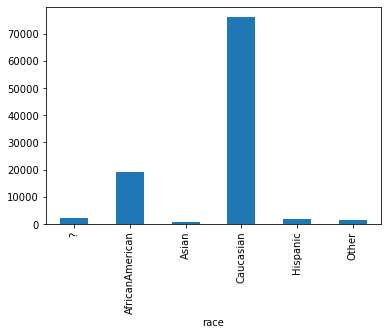

In [21]:
graph=df.groupby('race').count()
graph['readmitted'].plot(kind='bar')

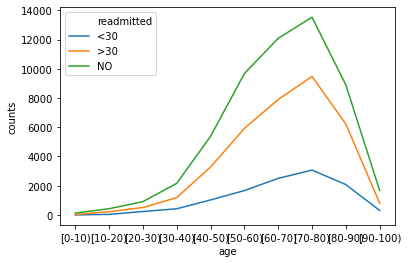

In [22]:
#lets visualize the age column
count_of_y = df["age"].groupby(df["readmitted"]).value_counts().rename("counts").reset_index()
fig = sns.lineplot(x="age", y="counts", hue="readmitted", data=count_of_y)

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

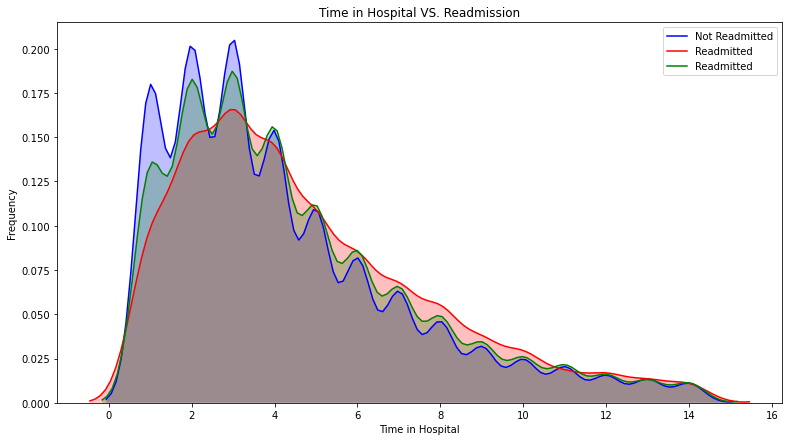

In [23]:
fig = plt.figure(figsize=(13,7))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] =='>30'),'time_in_hospital'] , color='g',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

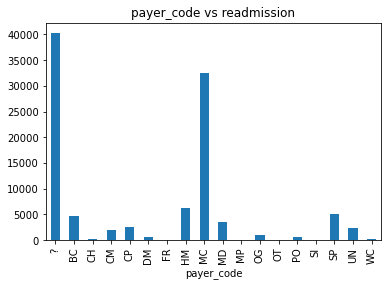

In [24]:
df.groupby('payer_code')['readmitted'].count().plot.bar(title='payer_code vs readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

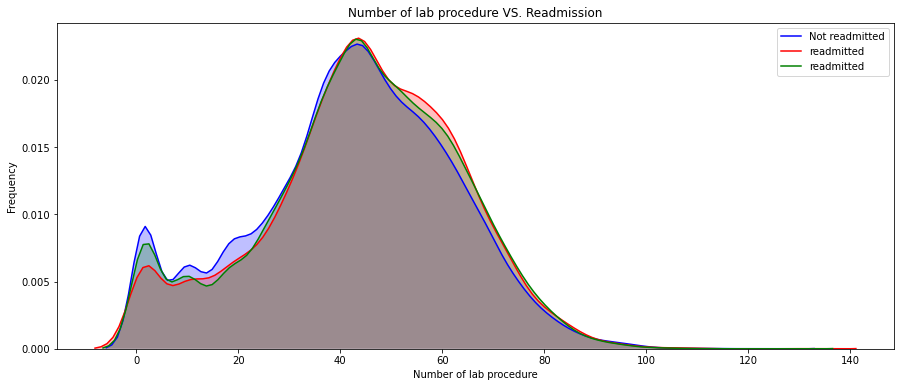

In [25]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '>30'),'num_lab_procedures'] , color='g',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

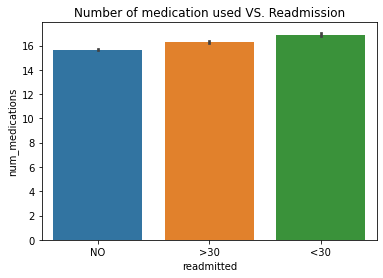

In [26]:
sns.barplot(y='num_medications',x='readmitted',data=df)
plt.title("Number of medication used VS. Readmission")

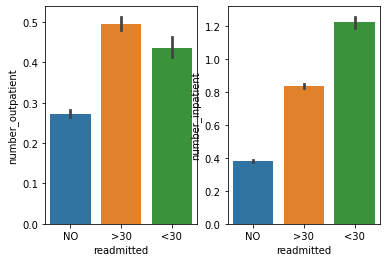

In [27]:
plt.figure
plt.subplot(1,2,1)
sns.barplot(y='number_outpatient',x='readmitted',data=df)
plt.subplot(1,2,2)
sns.barplot(y='number_inpatient',x='readmitted',data=df)

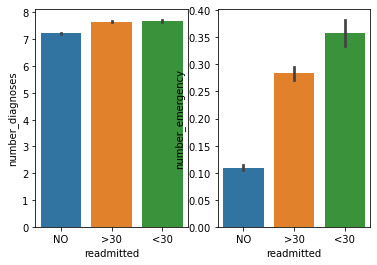

In [28]:
plt.figure
plt.subplot(1,2,1)
sns.barplot(y='number_diagnoses',x='readmitted',data=df)
plt.subplot(1,2,2)
sns.barplot(y='number_emergency',x='readmitted',data=df)

Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

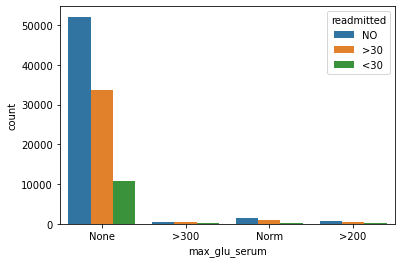

In [29]:
sns.countplot(x='max_glu_serum',hue='readmitted',data=df)

A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

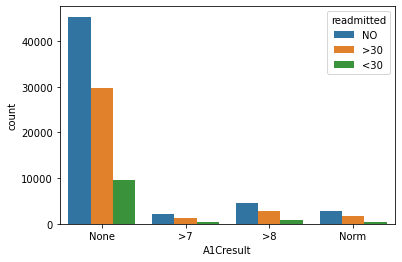

In [30]:
sns.countplot(x='A1Cresult',hue='readmitted',data=df)

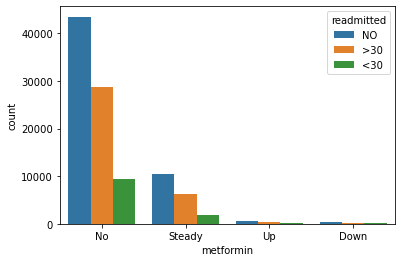

In [31]:
sns.countplot(x='metformin',hue='readmitted',data=df)

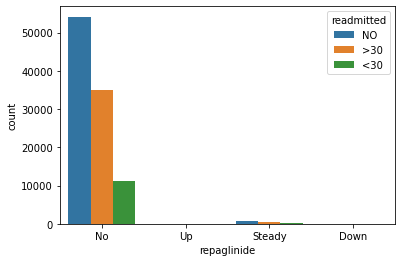

In [32]:
sns.countplot(x='repaglinide',hue='readmitted',data=df)

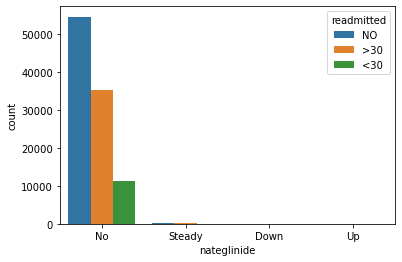

In [33]:
sns.countplot(x='nateglinide',hue='readmitted',data=df)

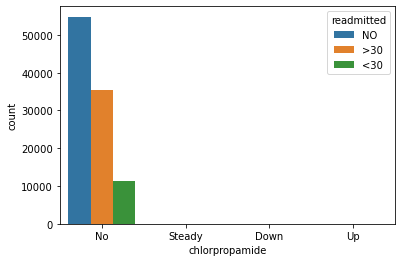

In [34]:
sns.countplot(x='chlorpropamide',hue='readmitted',data=df)

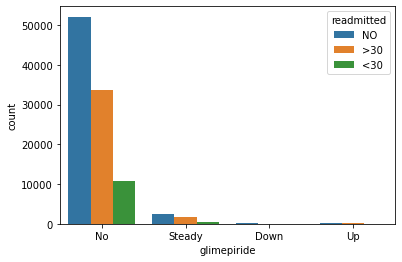

In [35]:
sns.countplot(x='glimepiride',hue='readmitted',data=df)

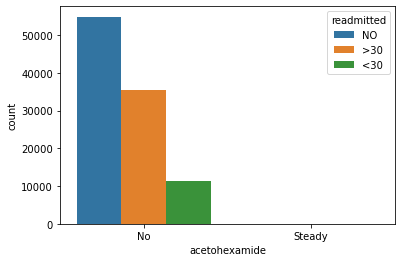

In [36]:
sns.countplot(x='acetohexamide',hue='readmitted',data=df)

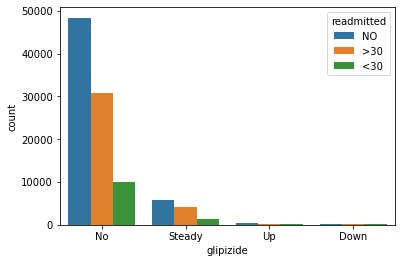

In [37]:
sns.countplot(x='glipizide',hue='readmitted',data=df)

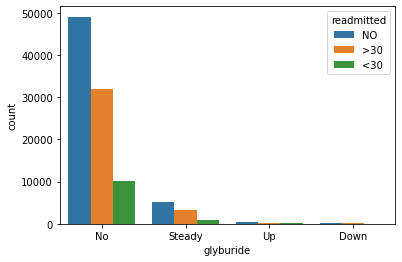

In [38]:
sns.countplot(x='glyburide',hue='readmitted',data=df)

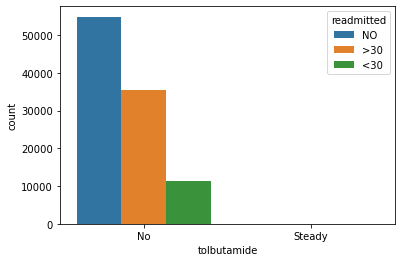

In [39]:
sns.countplot(x='tolbutamide',hue='readmitted',data=df)

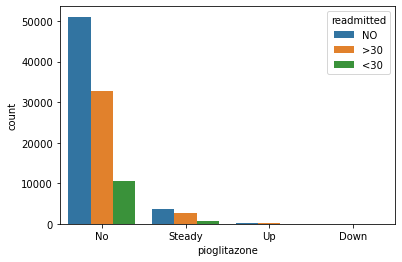

In [40]:
sns.countplot(x='pioglitazone',hue='readmitted',data=df)

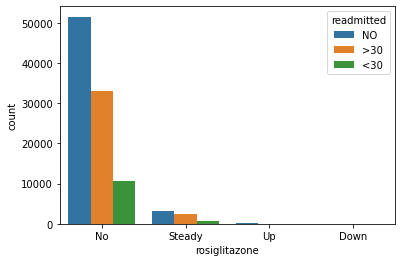

In [41]:
sns.countplot(x='rosiglitazone',hue='readmitted',data=df)

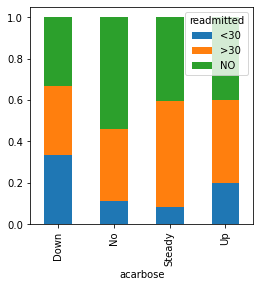

In [42]:
acarbose=pd.crosstab(df['acarbose'],df['readmitted'])
acarbose.div(acarbose.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

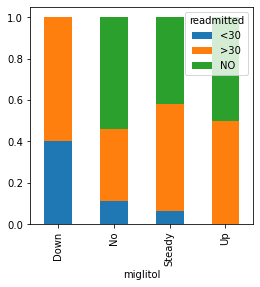

In [43]:
miglitol=pd.crosstab(df['miglitol'],df['readmitted'])
miglitol.div(miglitol.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

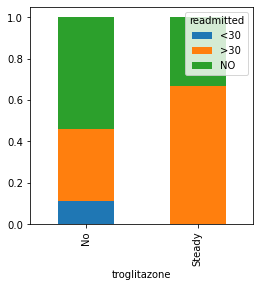

In [44]:
troglitazone=pd.crosstab(df['troglitazone'],df['readmitted'])
troglitazone.div(troglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

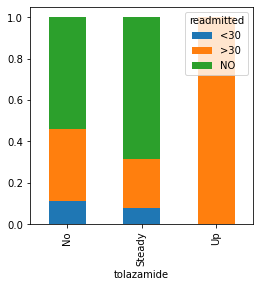

In [45]:
tolazamide=pd.crosstab(df['tolazamide'],df['readmitted'])
tolazamide.div(tolazamide.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

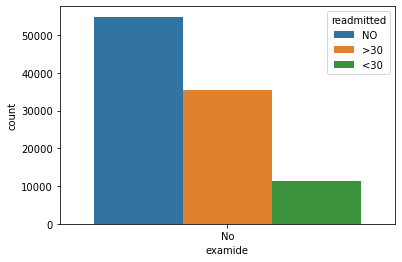

In [46]:
sns.countplot(x='examide',hue='readmitted',data=df)

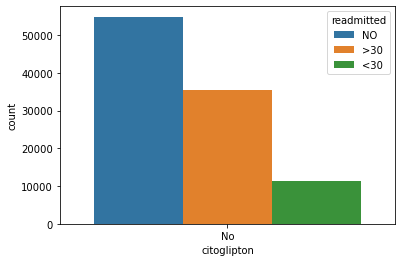

In [47]:
sns.countplot(x='citoglipton',hue='readmitted',data=df)

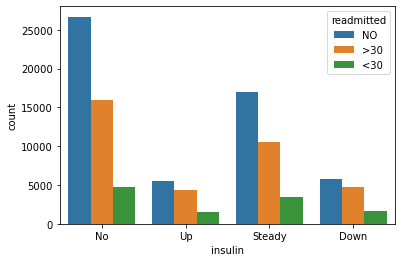

In [48]:
sns.countplot(x='insulin',hue='readmitted',data=df)

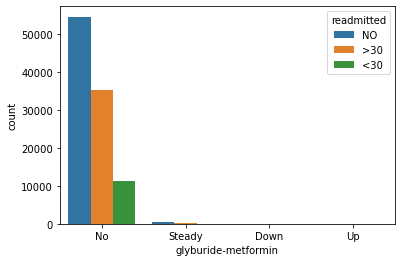

In [49]:
sns.countplot(x='glyburide-metformin',hue='readmitted',data=df)

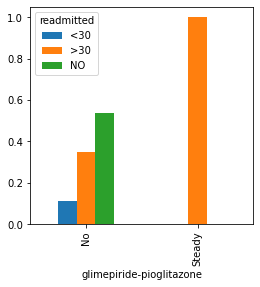

In [50]:
glimepiride_pioglitazone=pd.crosstab(df['glimepiride-pioglitazone'],df['readmitted'])
glimepiride_pioglitazone.div(glimepiride_pioglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

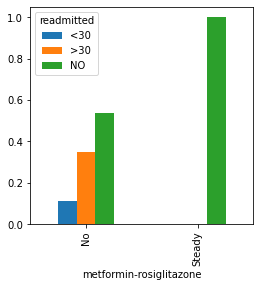

In [51]:
metformin_rosiglitazone=pd.crosstab(df['metformin-rosiglitazone'],df['readmitted'])
metformin_rosiglitazone.div(metformin_rosiglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

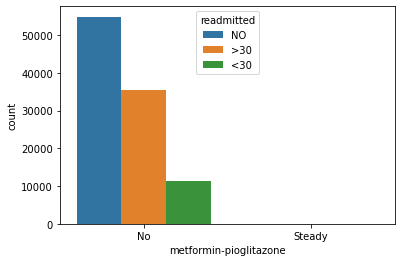

In [52]:
sns.countplot(x='metformin-pioglitazone',hue='readmitted',data=df)

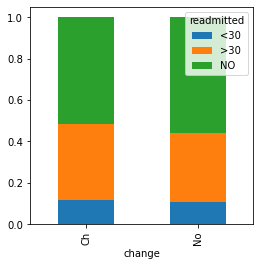

In [53]:
change=pd.crosstab(df['change'],df['readmitted'])
change.div(change.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

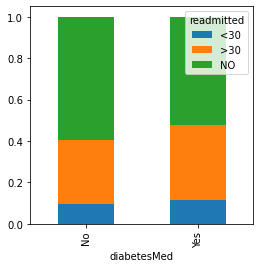

In [54]:
diabetesMed=pd.crosstab(df['diabetesMed'],df['readmitted'])
diabetesMed.div(diabetesMed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

## Data Pre-Processing

In [55]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [56]:
#check missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtypes=='O':
        print(col,df[col][df[col]=='?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [57]:
#Here we replace the ? with nan's
df=df.replace('?',np.nan)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [58]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [59]:
(df.isnull().sum()/len(df))*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

We can observe that weight contains 96 % missing values and payer_code,medical_specialty  has approximately 40%,50% missing values so there is no significance to filling those missing values. so we decided to drop those missing values

And also here race,diag_1,diag_2,diag_3 contains has less missing values when compared to other attributes so we can fill those missing values with something meaningful


In [60]:
#Here we drop the columns weight,payer_code,medical_speciality 
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [61]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [63]:
numerical_varibles=[var for var in df.columns if df[var].dtypes!='O']
print('There are {} numerical varibles'.format(len(numerical_varibles)))
print('The numerical varibles are:',numerical_varibles)

There are 13 numerical varibles
The numerical varibles are: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [64]:
df[numerical_varibles].head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


In [65]:
df[numerical_varibles].corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


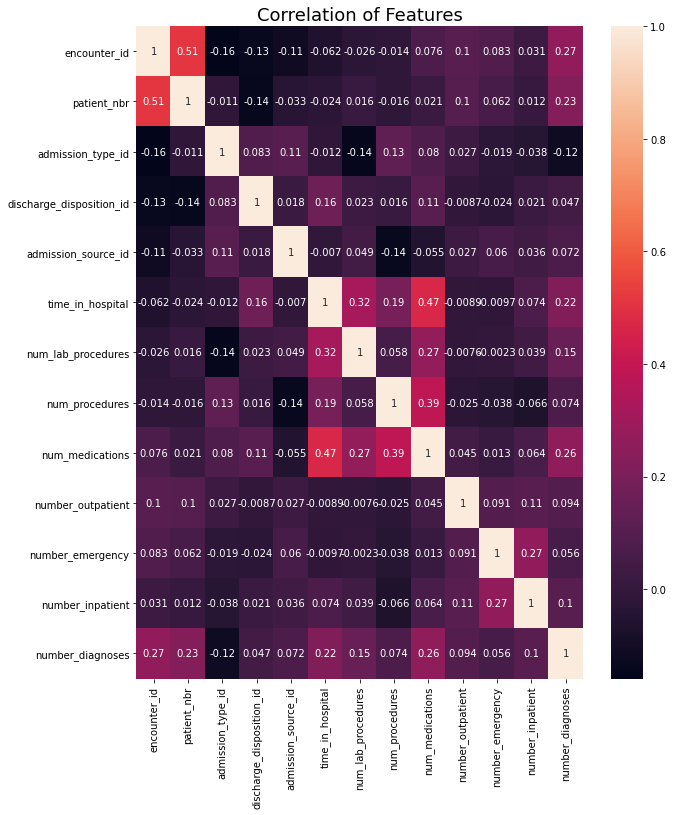

In [66]:
##Checking for feature correlations
corrmat=df[numerical_varibles].corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,12))
plt.title('Correlation of Features', fontsize=18)
sns.heatmap(df[top_corr_features].corr(),annot=True)
plt.show()

In [67]:
categorical_variables=[var for var in df.columns if df[var].dtypes=='O']
print('There are {} categorical varibles'.format(len(categorical_variables)))
print('The catgorical varibles are:',categorical_variables)
      

There are 34 categorical varibles
The catgorical varibles are: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [68]:
df[categorical_variables].isnull().sum()

race                        2273
gender                         0
age                            0
diag_1                        21
diag_2                       358
diag_3                      1423
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
examide                        0
citoglipton                    0
insulin                        0
glyburide-metformin            0
glipizide-metformin            0
glimepiride-pioglitazone       0
metformin-rosiglitazone        0
metformin-

In [69]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [70]:
#we map readmitted column and convert into numerical
df['readmitted']=df['readmitted'].map({'NO':0,'>30':0,'<30':1})

In [71]:
df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [72]:
#check race contains how many unique values
print('race contains:',len(df['race'].unique()),'labels')
df['race'].unique()

race contains: 6 labels


array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [73]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

we can observe that most of the people in the dataset are Caucasian ,so we can impute race feature using mode

In [74]:
#lets find unique value of gender
print('gender contains:',len(df['gender'].unique()),'labels')
df['gender'].unique()

gender contains: 3 labels


array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [75]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

We can observe that Gender contains coded differently i.e Unknown/Invalid will be treated as NA, so we can replace unknown/invalid with mode

In [76]:
#Replace Unknown/Invalid with nan 
df['gender']=df['gender'].replace('Unknown/Invalid',np.nan)

In [77]:
#check unique value of gender column
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [78]:
#Here we replace missing values with mode
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['race'].fillna(df['race'].mode()[0],inplace=True)

In [79]:
#lets find diag_1,diag_2,diag_3 columns of unique values
print('diag_1 contains:',len(df['diag_1'].unique()),'labels')
print('diag_2 contains:',len(df['diag_2'].unique()),'labels')
print('diag_3 contains:',len(df['diag_3'].unique()),'labels')

diag_1 contains: 717 labels
diag_2 contains: 749 labels
diag_3 contains: 790 labels


In [80]:
#We have more frequent categories, so we just replace missing with a category
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [81]:
for feature in ['diag_1','diag_2','diag_3']:
    impute_nan(df,feature)

In [82]:
df[categorical_variables].isnull().sum()

race                        0
gender                      0
age                         0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted

In [83]:
#check age of unique values
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [84]:
#Here we create like json structure and map into age column
df['age']=df['age'].map({'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})

In [85]:
df['age'].head()

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64

In [86]:
#check max_glu_serum,A1Cresult unique vaues
print(df['max_glu_serum'].unique())
print(df['A1Cresult'].unique())

['None' '>300' 'Norm' '>200']
['None' '>7' '>8' 'Norm']


Here both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [87]:
#we convert categorical varible into numerical variable
#we convertred like json structure and then map into columns
df['max_glu_serum']=df['max_glu_serum'].map({'None':0,'Norm':1,'>200':2,'>300':3})
df['A1Cresult']=df['A1Cresult'].map({'None':0,'Norm':1,'>7':2,'>8':3})

In [88]:
columns=df[['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]

In [89]:
columns.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [90]:
for i in columns:
    print(i,'contains:',len(df[i].unique()),'labels')

metformin contains: 4 labels
repaglinide contains: 4 labels
nateglinide contains: 4 labels
chlorpropamide contains: 4 labels
glimepiride contains: 4 labels
acetohexamide contains: 2 labels
glipizide contains: 4 labels
glyburide contains: 4 labels
tolbutamide contains: 2 labels
pioglitazone contains: 4 labels
rosiglitazone contains: 4 labels
acarbose contains: 4 labels
miglitol contains: 4 labels
troglitazone contains: 2 labels
tolazamide contains: 3 labels
examide contains: 1 labels
citoglipton contains: 1 labels
insulin contains: 4 labels
glyburide-metformin contains: 4 labels
glipizide-metformin contains: 2 labels
glimepiride-pioglitazone contains: 2 labels
metformin-rosiglitazone contains: 2 labels
metformin-pioglitazone contains: 2 labels


In [91]:
#Here we map into labels and convert into numerical
for i in columns:
    df[i]=df[i].map({'No':0,'Steady':1,'Down':1,'Up':1})

In [92]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,41,...,0,0,0,0,0,0,0,No,No,0
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,...,0,1,0,0,0,0,0,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,...,0,0,0,0,0,0,0,No,Yes,0
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,...,0,1,0,0,0,0,0,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,...,0,1,0,0,0,0,0,Ch,Yes,0


In [93]:
#Here we check change varible of unique values
print('change contains:',len(df['change'].unique()),'labels')
df['change'].value_counts()

change contains: 2 labels


No    54755
Ch    47011
Name: change, dtype: int64

In [94]:
df['change']=df['change'].map({'No':0,'Ch':1})

In [95]:
df['change'].head()

0    0
1    1
2    0
3    1
4    1
Name: change, dtype: int64

In [96]:
print('diabetesMed contains:',len(df['diabetesMed'].unique()),'labels')
df['diabetesMed'].value_counts()

diabetesMed contains: 2 labels


Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [97]:
#we can coverted into numerical so that mapped the values
df['diabetesMed']=df['diabetesMed'].map({'Yes':1,'No':0})

In [98]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [99]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['race']=lr.fit_transform(df['race'])

In [100]:
df['race']=df['race'].astype('int64')

In [101]:
#drop the diagonsis columns bcz it has high unique columns and it leads to cardinality
df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [102]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,5,6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,2,0,15,1,1,7,3,59,...,0,1,0,0,0,0,0,1,1,0
2,64410,86047875,0,0,25,1,1,7,2,11,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,2,1,35,1,1,7,2,44,...,0,1,0,0,0,0,0,1,1,0
4,16680,42519267,2,1,45,1,1,7,1,51,...,0,1,0,0,0,0,0,1,1,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  int64
 3   gender                    101766 non-null  int64
 4   age                       101766 non-null  int64
 5   admission_type_id         101766 non-null  int64
 6   discharge_disposition_id  101766 non-null  int64
 7   admission_source_id       101766 non-null  int64
 8   time_in_hospital          101766 non-null  int64
 9   num_lab_procedures        101766 non-null  int64
 10  num_procedures            101766 non-null  int64
 11  num_medications           101766 non-null  int64
 12  number_outpatient         101766 non-null  int64
 13  number_emergency          101766 non-null  int64
 14  number_inpatient    

In [104]:
#check correlation of indepedent and target column
clm=df.columns
for i in clm:
    print('correlation between ',i,'and readmitted is ',df[i].corr(df['readmitted']))

correlation between  encounter_id and readmitted is  -0.008518598145285194
correlation between  patient_nbr and readmitted is  0.007893288940943535
correlation between  race and readmitted is  -0.002825245062278321
correlation between  gender and readmitted is  -0.002897950833680294
correlation between  age and readmitted is  0.017634327821659572
correlation between  admission_type_id and readmitted is  -0.01165137288870758
correlation between  discharge_disposition_id and readmitted is  0.05056026858575127
correlation between  admission_source_id and readmitted is  0.005819596094426516
correlation between  time_in_hospital and readmitted is  0.04419941845744686
correlation between  num_lab_procedures and readmitted is  0.020363602567542428
correlation between  num_procedures and readmitted is  -0.012226934251745264
correlation between  num_medications and readmitted is  0.038431822165995604
correlation between  number_outpatient and readmitted is  0.018893470155426466
correlation betw

In [105]:
df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

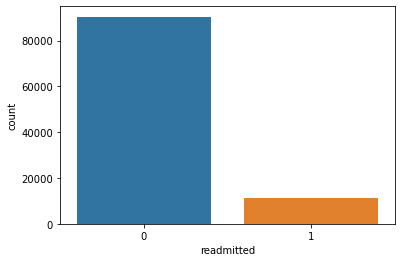

In [106]:
sns.countplot(x='readmitted',data=df)

Here we can noticed that our target column having imbalanced ,

In [107]:
X=df.drop('readmitted',axis=1)
y=df['readmitted']

In [108]:
X.shape,y.shape

((101766, 43), (101766,))

## Feature Selection

In [109]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX]
        Y = self.df[colY]
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [110]:
cT = ChiSquare(df)
for var in df:
    cT.TestIndependence(colX=var,colY="readmitted" ) 

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is NOT an important predictor. (Discard patient_nbr from model)
race is NOT an important predictor. (Discard race from model)
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
admission_type_id is IMPORTANT for Prediction
discharge_disposition_id is IMPORTANT for Prediction
admission_source_id is IMPORTANT for Prediction
time_in_hospital is IMPORTANT for Prediction
num_lab_procedures is IMPORTANT for Prediction
num_procedures is IMPORTANT for Prediction
num_medications is IMPORTANT for Prediction
number_outpatient is IMPORTANT for Prediction
number_emergency is IMPORTANT for Prediction
number_inpatient is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
max_glu_serum is IMPORTANT for Prediction
A1Cresult is IMPORTANT for Prediction
metformin is IMPORTANT for Prediction
repaglinide is IMPORTANT for Prediction
nateglinide is NOT an

In [111]:
df.drop(['encounter_id','metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone','glipizide-metformin',
        'glyburide-metformin','citoglipton','examide','tolazamide','troglitazone','miglitol','tolbutamide','glyburide',
        'acetohexamide','chlorpropamide','nateglinide','patient_nbr'],axis=1,inplace=True)

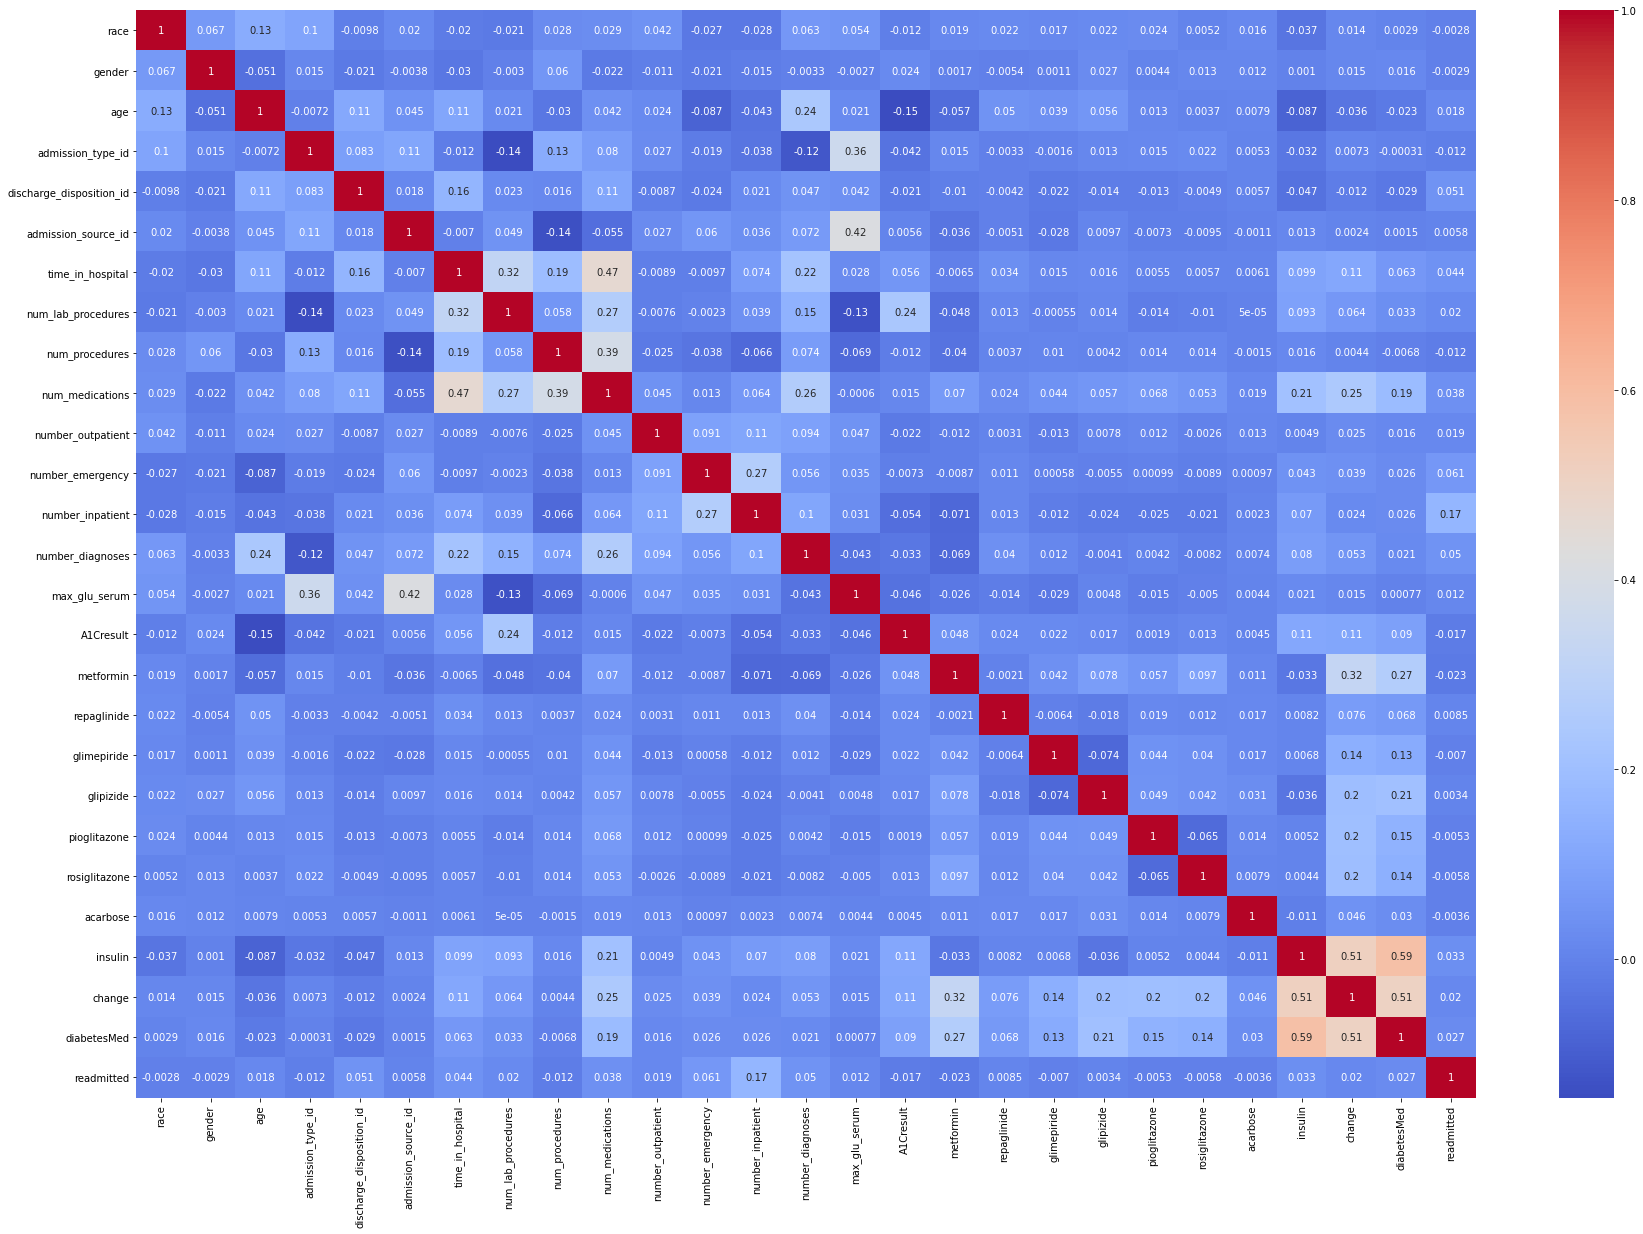

In [112]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## Model Building

In [113]:


X=df.drop('readmitted',axis=1)
y=df['readmitted']

In [117]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(fit_intercept=True, penalty='l2')

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [119]:
lr.fit(X_train,y_train)

D:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
pred=lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [122]:
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 0.885870099243392
confusion_matrix: [[18001    33]
 [ 2290    30]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18034
           1       0.48      0.01      0.03      2320

    accuracy                           0.89     20354
   macro avg       0.68      0.51      0.48     20354
weighted avg       0.84      0.89      0.84     20354



In [123]:
#DecisionTreeClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [124]:
dr=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [125]:
dr.fit(X_train,y_train)
#rf.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
pred=dr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 0.7958140905964429
confusion_matrix: [[15752  2282]
 [ 1874   446]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.87      0.88     18034
           1       0.16      0.19      0.18      2320

    accuracy                           0.80     20354
   macro avg       0.53      0.53      0.53     20354
weighted avg       0.81      0.80      0.80     20354



In [128]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [129]:
pred=rf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
print('accuracy_score:',accuracy_score(y_test,pred))
print('confusion_matrix:',confusion_matrix(y_test,pred))
print('classification_report:',classification_report(y_test,pred))

accuracy_score: 0.8859192296354524
confusion_matrix: [[18005    29]
 [ 2293    27]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18034
           1       0.48      0.01      0.02      2320

    accuracy                           0.89     20354
   macro avg       0.68      0.51      0.48     20354
weighted avg       0.84      0.89      0.83     20354



In [131]:
#Naive_Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [132]:
nb = GaussianNB()

In [133]:
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [134]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.8437653532475189
confusion_matrix: [[16830  1204]
 [ 1976   344]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.93      0.91     18034
           1       0.22      0.15      0.18      2320

    accuracy                           0.84     20354
   macro avg       0.56      0.54      0.55     20354
weighted avg       0.82      0.84      0.83     20354



Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

## Handle Imbalance with Smote Techniques

In [135]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [136]:
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTETomek(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))


Original dataset shape Counter({0: 90409, 1: 11357})
New dataset shape Counter({0: 89800, 1: 89800})


In [138]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)


D:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2920,3441,6361
1,370,437,807
All,3290,3878,7168


In [140]:
print('accuracy_score:',accuracy_score(y_test,logit_pred))
print('confusion_matrix:',confusion_matrix(y_test,logit_pred))
print('classification_report:',classification_report(y_test,logit_pred))

accuracy_score: 0.7002227171492205
confusion_matrix: [[11738  6121]
 [ 4647 13414]]
classification_report:               precision    recall  f1-score   support

           0       0.72      0.66      0.69     17859
           1       0.69      0.74      0.71     18061

    accuracy                           0.70     35920
   macro avg       0.70      0.70      0.70     35920
weighted avg       0.70      0.70      0.70     35920



In [141]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
de = DecisionTreeClassifier()
de.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
de_pred = de.predict(X_test)

In [143]:
print('accuracy_score:',accuracy_score(y_test,de_pred))
print('confusion_matrix:',confusion_matrix(y_test,de_pred))
print('classification_report:',classification_report(y_test,de_pred))

accuracy_score: 0.7965757238307349
confusion_matrix: [[13456  4403]
 [ 2904 15157]]
classification_report:               precision    recall  f1-score   support

           0       0.82      0.75      0.79     17859
           1       0.77      0.84      0.81     18061

    accuracy                           0.80     35920
   macro avg       0.80      0.80      0.80     35920
weighted avg       0.80      0.80      0.80     35920



In [144]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
re = RandomForestClassifier(n_estimators=50, random_state=0)
re.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [145]:
re_pred = re.predict(X_test)

In [146]:
print('accuracy_score:',accuracy_score(y_test,re_pred))
print('confusion_matrix:',confusion_matrix(y_test,re_pred))
print('classification_report:',classification_report(y_test,re_pred))

accuracy_score: 0.8751948775055679
confusion_matrix: [[15569  2290]
 [ 2193 15868]]
classification_report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87     17859
           1       0.87      0.88      0.88     18061

    accuracy                           0.88     35920
   macro avg       0.88      0.88      0.88     35920
weighted avg       0.88      0.88      0.88     35920



In [147]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [148]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [149]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.6628897550111359
confusion_matrix: [[ 7859 10000]
 [ 2109 15952]]
classification_report:               precision    recall  f1-score   support

           0       0.79      0.44      0.56     17859
           1       0.61      0.88      0.72     18061

    accuracy                           0.66     35920
   macro avg       0.70      0.66      0.64     35920
weighted avg       0.70      0.66      0.65     35920



In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knr=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [152]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
knr.fit(X_train,y_train)
y_pred=knr.predict(X_test)

In [153]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.8093819599109131
confusion_matrix: [[11224  6635]
 [  212 17849]]
classification_report:               precision    recall  f1-score   support

           0       0.98      0.63      0.77     17859
           1       0.73      0.99      0.84     18061

    accuracy                           0.81     35920
   macro avg       0.86      0.81      0.80     35920
weighted avg       0.85      0.81      0.80     35920



### checking overfitting or underfitting


In [154]:
print('Train set score: ',format(logit.score(X_train,y_train)))
print('Test set score: ',format(logit.score(X_test,y_test)))

Train set score:  0.7005776726057906
Test set score:  0.7002227171492205


In [155]:
print('Train set score: ',format(de.score(X_train,y_train)))
print('Test set score: ',format(de.score(X_test,y_test)))

Train set score:  0.9998956013363028
Test set score:  0.7965757238307349


In [156]:
print('Train set score: ',format(re.score(X_train,y_train)))
print('Test set score: ',format(re.score(X_test,y_test)))

Train set score:  0.9997703229398663
Test set score:  0.8751948775055679


In [157]:
print('Train set score: ',format(knr.score(X_train,y_train)))
print('Test set score: ',format(knr.score(X_test,y_test)))

Train set score:  0.8623747216035634
Test set score:  0.8093819599109131


In [158]:
print('Train set score: ',format(nb.score(X_train,y_train)))
print('Test set score: ',format(nb.score(X_test,y_test)))

Train set score:  0.6612263363028953
Test set score:  0.6628897550111359


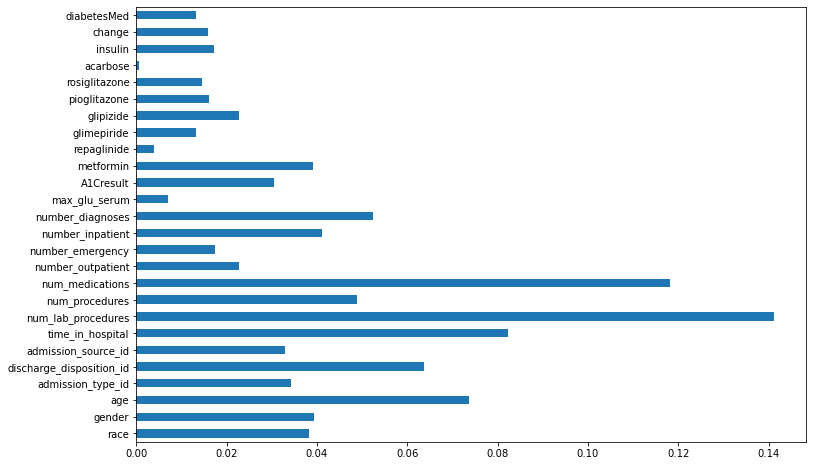

In [159]:
#let us find feature importance now i.e which feature is most important for this problem
importances=pd.Series(re.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))